C:\Users\HP\AppData\Local\Temp\ipykernel_17392\2815456215.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  oil_data = yf.download("CL=F", start="2022-01-01", end="2025-12-31")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open  Volume
Ticker           CL=F       CL=F       CL=F       CL=F    CL=F
Date                                                          
2022-01-03  76.080002  76.459999  74.269997  75.690002  317628
2022-01-04  76.989998  77.639999  75.699997  76.019997  372848
2022-01-05  77.849998  78.580002  76.510002  77.180000  397898
2022-01-06  79.459999  80.239998  76.730003  77.239998  476665
2022-01-07  78.900002  80.470001  78.519997  79.620003  414434
MSE: 2.012591395502792
R² Score: 0.9099114368364006


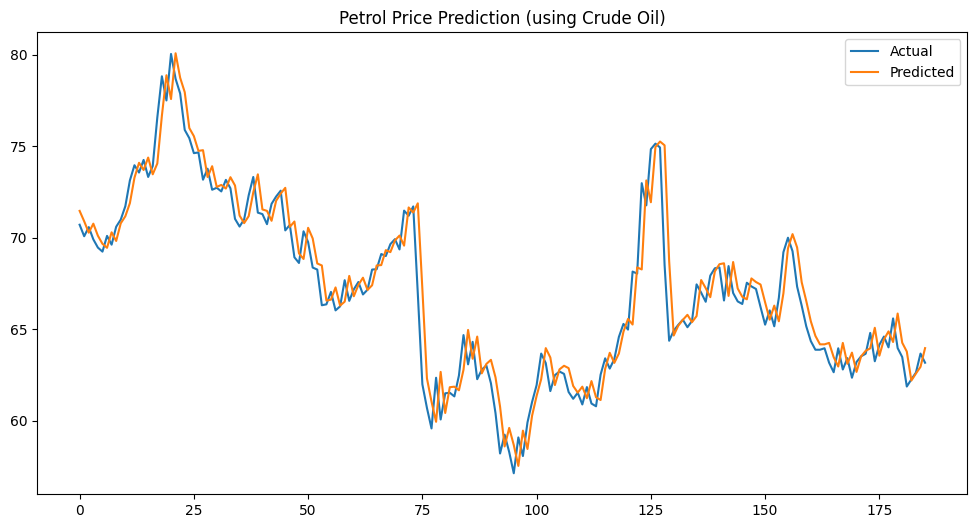

Predicted next day petrol price (proxy): 63.97 USD per barrel
Predicted next day petrol price (proxy): 63.97 USD per barrel


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

# Download crude oil prices (proxy for petrol)
oil_data = yf.download("CL=F", start="2022-01-01", end="2025-12-31")

print(oil_data.head())

# Data Preprocessing
df = oil_data[['Close']].copy()
df = df.dropna()

# Create shifted column for supervised learning
df['Target'] = df['Close'].shift(-1)
df = df.dropna()

# Train-Test Split
X = df[['Close']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Petrol Price Prediction (using Crude Oil)")
plt.show()

# Predict next day's price
latest_price = df['Close'].iloc[-1]
# Predict next day's price
latest_price = df['Close'].iloc[-1]
future_price = model.predict(np.array(latest_price).reshape(-1, 1))
print(f"Predicted next day petrol price (proxy): {future_price[0]:.2f} USD per barrel")

print(f"Predicted next day petrol price (proxy): {future_price[0]:.2f} USD per barrel")
